# Import and configuration

In [1]:
import numpy as np
import os
import sys
sys.path.append('..')

if 'JCMPYTHON_CONFIG_FILE' in os.environ:
    del os.environ['JCMPYTHON_CONFIG_FILE']
import jcmpython as jpy

[INFO] init: Writing logs to file: /hmi/kme/workspace/jcmpython/zib_presentation/logs/160831.log
[INFO] init: Imported jcmwave from: /hmi/kme/programs/JCMsuite_3_0_9


**jcmpython detected a configuration file:** 

In [2]:
with open(jpy._config.config_file, 'r') as f:
    content = ''.join(f.readlines()[0:12])
print content+'...'

[User]
email = carlo.barth@helmholtz-berlin.de

[Preferences]
colormap = viridis

[Storage]
base = /net/group/kme-data/simulations

[Data]
projects = /hmi/kme/workspace/jcmpython/projects
refractiveIndexDatabase = /hmi/kme/workspace/RefractiveIndex/database
...


**We can print license or version info...**

In [3]:
jpy.jcm_license_info()

[INFO] init: 
[INFO] init: JCMwave(R) FEM-Solver , Version 3.0.9-release
[INFO] init: Modules: Electromagnetics ElectromagneticsTimeDependent ContinuumMechanics HeatConduction
[INFO] init: Buildtag: linux64-2016.06.24.09.46
[INFO] init: 
[INFO] init: *** license status ***
[INFO] init: 
[INFO] init:   JCMROOT: /hmi/kme/programs/JCMsuite_3_0_9
[INFO] init:   Host: nanosippe03
[INFO] init:   License File: /hmi/kme/programs/JCMsuite_3_0_9/license/license.ljcm
[INFO] init:   Server: nanosippe03
[INFO] init:   HW-Adapter: F8-B1-56-D8-95-11
[INFO] init:   Licensed OS: LINUX
[INFO] init:   License period: 2015-06-08 -> 2016-12-31 
[INFO] init:   Number of licenses: 12
[INFO] init: 


**... but they are also stored in module attributes**

In [4]:
print 'Version of JCMsuite:', jpy.__jcm_version__
print 'Version of jcmpython:', jpy.__version__

Version of JCMsuite: 3.0.9
Version of jcmpython: 2.1.2


## Extensions

In [5]:
print 'Known extensions:', jpy.extensions

Known extensions: ['materials']


In [6]:
help(jpy.load_extension)

Help on function load_extension in module jcmpython:

load_extension(ext_name)
    Loads the specified extension of jcmpython.
    
    See `jcmpython.extensions` for a list of extensions.



# Project management

**We specify the path to our project - absolute or relative to the configured project base**

In [7]:
project = jpy.JCMProject('scattering/mie/mie2D')

**The project (.jcmp[t]) file is detected automatically, or can be specified**

In [8]:
project.project_file_name

'mie2D.jcmp'

# Simulation sets

**We distinguish three types of input parameters:**
  - **`constants`**: can be of any type, but *not stored*
  - **`parameters`**: parameters that *do not* change the geometry
  - **`geometry`**: parameters that *do* change the geometry, i.e. belong to the `layout.jcmt`

**Let's specify 40 different radii**

In [9]:
mie_keys = {'constants' :{},
            'parameters': {},
            'geometry': {'radius':np.linspace(0.3, 0.5, 40)}}

**We initialized a `SimulationSet`**

In [10]:
simuset = jpy.SimulationSet(project, mie_keys,
                            storage_folder='mie2D_test',
                            storage_base=os.getcwd())

[INFO] core.SimulationSet: Using folder /hmi/kme/workspace/jcmpython/zib_presentation/mie2D_test for data storage.


**The `storage_dir` now contains an `.h5` database file**

In [11]:
os.listdir(simuset.storage_dir)

['simulation000000', 'result_database.h5']

**We make a schedule:**

  1. all parameter combinations are determinded,
  2. simulations are sorted in a way to have minimal calls of JCMgeo
  3. database is checked for matching simulations which already have been done

In [12]:
simuset.make_simulation_schedule()

[INFO] core.SimulationSet: Loops will be done over the following parameter(s): ['radius']
[INFO] core.SimulationSet: Total number of simulations: 40


**The store is empty**

In [13]:
simuset.is_store_empty()

True

## Managing resources

**All configured resources are:**

In [14]:
jpy.resources

{'dinux6': Workstation(dinux6, M=4, N=2),
 'dinux7': Workstation(dinux7, M=16, N=1),
 'htc027': Workstation(htc027, M=16, N=1),
 'localhost': Workstation(localhost, M=1, N=1)}

**We can easily change the multiplicity and the number of threads**

In [15]:
simuset.use_only_resources('localhost')
simuset.resources['localhost'].set_m_n(4,1)
print simuset.resources

[INFO] core.SimulationSet: Restricting resources to: ['localhost']
{'localhost': Workstation(localhost, M=4, N=1)}


## Computing geometries only

**The first simulation of our set has the following properties**

In [16]:
sim = simuset.simulations[0]
print sim
print 'keys:', sim.keys

Simulation(number=0, status=Pending)
keys: {'radius': 0.29999999999999999}


**Run jcm.geo**

In [17]:
simuset.compute_geometry(sim)#, show=float('inf'))

The project's working directory now contains a grid file:

In [18]:
'grid.jcm' in os.listdir(simuset.get_project_wdir())

True

## Running a single simulation

**We can solve a single simulation using our simulation set**

In [19]:
results, logs = simuset.solve_single_simulation(sim)

[WARNING] py.warnings: /hmi/kme/.local/lib/python2.7/site-packages/jcmpython/parallelization.py:228: RuntimeWarning: Ignoring deprecated argument "JCMKERNEL".
  **self.kwargs)



**The results are stored in the simulation instance**

In [21]:
print sim.logs['Out']




*** Solving /hmi/kme/workspace/jcmpython/zib_presentation/mie2D_test/simulation000000/mie2D.jcmp on refinement level 0 ... 

  A priori segments/wavelength (quality = 2.00e-02)
  FEM degree  'one wavelength'  direction X  direction Y
--------------------------------------------------------
           1              5.57        33.68        33.68
           2              2.65         6.99         6.99
           3              1.90         3.57         3.57
           4              1.34         2.11         2.11
           5              1.04         1.47         1.47
           6              0.85         1.11         1.11
           7              0.72         0.88         0.88
           8              0.61         0.73         0.73
           9              0.53         0.62         0.62
          10              0.47         0.54         0.54
  minimum seg/wavelength in grid : 2.75
  maximum seg/wavelength in grid : 37.35

  *** A priori interior domain wave propagation charac

In [25]:
print 'Exit code:', sim.exit_code
print 'Resource ID:', sim.resource_id
print 'Fieldbag file:', sim.fieldbag_file

Exit code: 0
Resource ID: 0
Fieldbag file: /hmi/kme/workspace/jcmpython/zib_presentation/mie2D_test/simulation000000/mie2D_results/fieldbag.jcm


## Result processing

**The default processing only extracts the computational costs**

In [26]:
sim.process_results()

**The internal results dict now contains these results**

In [27]:
sim._results_dict

{'AccumulatedCPUTime': 1.33931,
 'AccumulatedTotalTime': 1.0,
 'CpuPerUnknown': 4.519774011299435e-05,
 'CpuTime': 1.0,
 'CpuTimeAssembling': 0.221724,
 'CpuTimeInnerNodeUpdate': 0.106681,
 'CpuTimeSolve': 0.140904,
 'FEDegree0_Percentage': 0.0,
 'FEDegree10_Percentage': 0.0,
 'FEDegree1_Percentage': 0.0,
 'FEDegree2_Percentage': 10.96666666666667,
 'FEDegree3_Percentage': 28.350000000000001,
 'FEDegree4_Percentage': 60.68333333333333,
 'FEDegree5_Percentage': 0.0,
 'FEDegree6_Percentage': 0.0,
 'FEDegree7_Percentage': 0.0,
 'FEDegree8_Percentage': 0.0,
 'FEDegree9_Percentage': 0.0,
 'Level': 0,
 'SystemMemory_GB': 0.0231475830078125,
 'TotalMemory_GB': 0.3463897705078125,
 'TotalTime': 1,
 'TotalTimeAssembling': 1.0,
 'TotalTimeInnerNodeUpdate': 0.0,
 'TotalTimeSolve': 0.0,
 'Unknowns': 22125}

**The status is updated**

In [28]:
sim.status

'Finished and processed'

**All post-processing results are stored as well**

In [29]:
sim.jcm_results[1:]

[{'AbsElectromagneticFieldEnergyFlux': {0: array([  3.28057130e-09])},
  'DomainIdFirst': array([1], dtype=int32),
  'DomainIdSecond': array([1], dtype=int32),
  'ElectromagneticFieldEnergyFlux': {0: array([  3.27832759e-09 -1.14326522e-11j])},
  'title': 'ElectromagneticFieldEnergyFlux'}]

**We can process the post processing results using a custom function**

In [30]:
def read_scs(pp):
    results = {} #must be a dict
    results['SCS'] = pp[0]['ElectromagneticFieldEnergyFlux'][0][0].real
    return results

In [31]:
sim.process_results(processing_func=read_scs, overwrite=True)

**'SCS' is now in the `_results_dict`:**

In [32]:
sim._results_dict

{'AccumulatedCPUTime': 1.33931,
 'AccumulatedTotalTime': 1.0,
 'CpuPerUnknown': 4.519774011299435e-05,
 'CpuTime': 1.0,
 'CpuTimeAssembling': 0.221724,
 'CpuTimeInnerNodeUpdate': 0.106681,
 'CpuTimeSolve': 0.140904,
 'FEDegree0_Percentage': 0.0,
 'FEDegree10_Percentage': 0.0,
 'FEDegree1_Percentage': 0.0,
 'FEDegree2_Percentage': 10.96666666666667,
 'FEDegree3_Percentage': 28.350000000000001,
 'FEDegree4_Percentage': 60.68333333333333,
 'FEDegree5_Percentage': 0.0,
 'FEDegree6_Percentage': 0.0,
 'FEDegree7_Percentage': 0.0,
 'FEDegree8_Percentage': 0.0,
 'FEDegree9_Percentage': 0.0,
 'Level': 0,
 'SCS': 3.2783275920030418e-09,
 'SystemMemory_GB': 0.0231475830078125,
 'TotalMemory_GB': 0.3463897705078125,
 'TotalTime': 1,
 'TotalTimeAssembling': 1.0,
 'TotalTimeInnerNodeUpdate': 0.0,
 'TotalTimeSolve': 0.0,
 'Unknowns': 22125}

## Running all simulations

**We can run and process all simulations in parallel using the simulation set**

In [33]:
simuset.run(N=10, processing_func=read_scs)

[INFO] core.SimulationSet: Starting to solve.
[INFO] core.SimulationSet: Waiting for 10 simulation(s) to finish (40 remaining in total).
[INFO] core.SimulationSet: Approx. remaining time: 0:00:16.820214
[INFO] core.SimulationSet: Waiting for 10 simulation(s) to finish (30 remaining in total).
[INFO] core.SimulationSet: Approx. remaining time: 0:00:11.865243
[INFO] core.SimulationSet: Waiting for 10 simulation(s) to finish (20 remaining in total).
[INFO] core.SimulationSet: Approx. remaining time: 0:00:05.756581
[INFO] core.SimulationSet: Waiting for 10 simulation(s) to finish (10 remaining in total).
[INFO] core.SimulationSet: Total time for all simulations: 0:00:23.175366


**The results can easily be plotted**

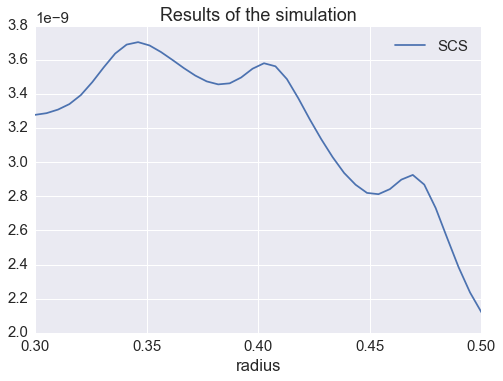

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5)

data = simuset.get_store_data().sort_values(by='radius')
data.plot(x='radius', y='SCS', title='Results of the simulation')
plt.show()

## Adding data in a later run

**If the simulations failed or additional data needs to be added, the simulation set notices the existing data**

In [36]:
extended_radii = np.append(np.linspace(0.5, 0.6, 40)[1:], np.linspace(0.3, 0.5, 40))
mie_keys_extended = {'constants' :{},
                     'parameters': {},
                     'geometry': {'radius':extended_radii}}

**Clean up ...**

In [37]:
simuset.close_store()
del simuset

**Schedule ...**

In [38]:
simuset = jpy.SimulationSet(project, mie_keys_extended,
                            storage_folder='mie2D_test',
                            storage_base=os.getcwd())
simuset.make_simulation_schedule()

[INFO] core.SimulationSet: Using folder /hmi/kme/workspace/jcmpython/zib_presentation/mie2D_test for data storage.
[INFO] core.SimulationSet: Loops will be done over the following parameter(s): ['radius']
[INFO] core.SimulationSet: Total number of simulations: 79
[INFO] core.SimulationSet: Running extended check ...
[INFO] core.SimulationSet: Found matches in the extended check of the HDF5 store. Number of stored simulations: 40


**Run the 39 remaining simulations and zip all working directories**

In [39]:
simuset.run(N=10, processing_func=read_scs, wdir_mode='zip')

[INFO] core.SimulationSet: Starting to solve.
[INFO] core.SimulationSet: Waiting for 10 simulation(s) to finish (39 remaining in total).
[INFO] core.SimulationSet: Approx. remaining time: 0:00:16.172064
[INFO] core.SimulationSet: Waiting for 10 simulation(s) to finish (29 remaining in total).
[INFO] core.SimulationSet: Approx. remaining time: 0:00:10.434767
[INFO] core.SimulationSet: Waiting for 10 simulation(s) to finish (19 remaining in total).
[INFO] core.SimulationSet: Approx. remaining time: 0:00:04.989826
[INFO] core.SimulationSet: Waiting for 9 simulation(s) to finish (9 remaining in total).
[INFO] core.SimulationSet: Treating old working directories with mode: zip
[INFO] core.SimulationSet: Total time for all simulations: 0:00:22.398345


**The storage folder contains the HDF5 store and a zip-archive**

In [40]:
os.listdir(simuset.storage_dir)

['result_database.h5', 'working_directories.zip']

**Let's plot again**

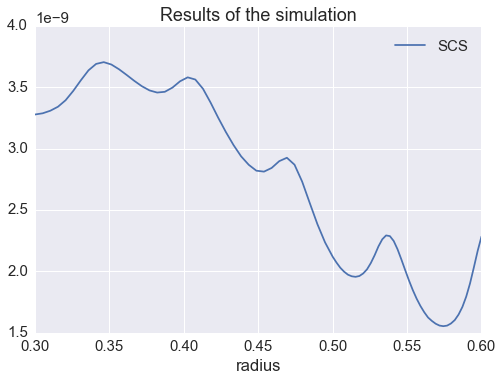

In [41]:
simuset.get_store_data().sort_values(by='radius').plot(x='radius', y='SCS', title='Results of the simulation')

**And write our data to a CSV**

In [42]:
simuset.write_store_data_to_file()